IMPORTANTO AS BIBLIOTECAS NECESSÁRIAS

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np

CARREGANDO O SHAPEFILE DA ÁREA DE ESTUDO E CRIANDO O MAPA

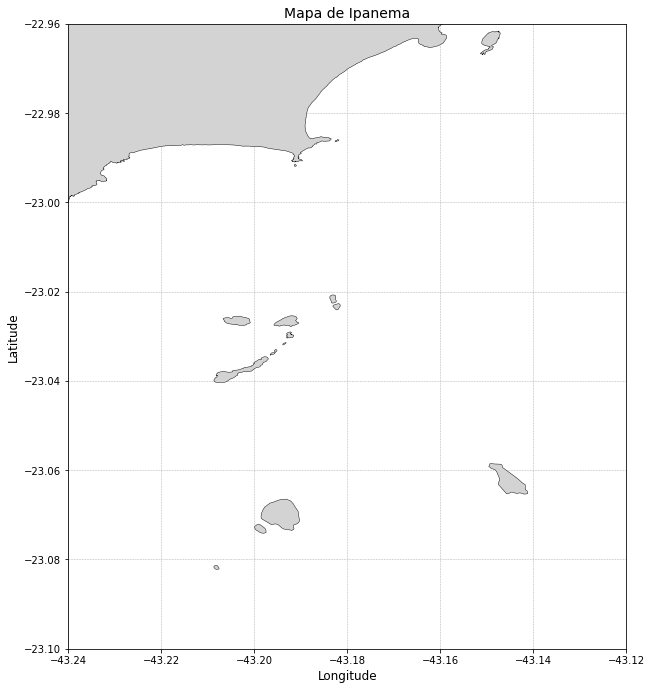

In [2]:
import json
data = json.load(open("/Users/jonatan/Documents/Aprendendo Python/datasets/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure(figsize=(10,11.5)) # definindo o tamanho da figura (deve ser na mesma proporção dos limites x e y)
ax = fig.add_subplot(111)

from shapely.geometry import asShape # manipular a geometria do shapefile
from descartes import PolygonPatch # plotando o polígono
ax.set_xlim(-43.24, -43.12) # 0.12 <- essa distância deve ser igual a proporção da figura
ax.set_ylim(-23.1, -22.96) # 0.15 <- essa distância deve ser igual a proporção da figura
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--')
ax.set_yticks(np.arange(-23.10,-22.96,0.02)) # setando os ticks


for feat in data["features"]:       # AQUI EU COLOCO A GEOMETRIA DO SHAPEFILE
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.45, ls='-', zorder=2))


IMPORTANDO OS DADOS DE BATIMETRIA DA REGIÃO

In [3]:
import pandas as pd
batimetria = pd.read_excel('/Users/jonatan/Downloads/batimetria_interpolada - Cópia.xlsx')

In [4]:
batimetria

,x,y,z
0,676290.00,7395500.0,0.0
1,676290.00,7395550.0,0.0
2,676290.00,7395600.0,0.0
3,676290.00,7395650.0,0.0
4,676290.00,7395700.0,0.0
...,...,...,...
771828,701831.12,7459773.4,-10.0
771829,701621.30,7460042.2,-10.0
771830,701204.95,7459760.3,-10.0
771831,701450.83,7459963.6,-10.0


DATUM DOS DADOS DE BATIMETRIA ESTÃO EM UTM - TRANSFORMAR PARA WGS84 

In [5]:
from pyproj import Proj # IMPORTANDO O PROJETOR 
#Definindo o datum de entrada e de saída para o projetor
myProj = Proj("+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")  

#Passando a projeção em cima dos dados de batimetria e definindo as variáveis
lon, lat = myProj(batimetria['x'].values, batimetria['y'].values, inverse=True) 

In [6]:

#Colocando as variáveis dentro do dataset
batimetria['lon'] = lon
batimetria['lat'] = lat

In [7]:
batimetria

,x,y,z,lon,lat
0,676290.00,7395500.0,0.0,-43.273004,-23.541255
1,676290.00,7395550.0,0.0,-43.273010,-23.540804
2,676290.00,7395600.0,0.0,-43.273015,-23.540352
3,676290.00,7395650.0,0.0,-43.273021,-23.539901
4,676290.00,7395700.0,0.0,-43.273027,-23.539449
...,...,...,...,...,...
771828,701831.12,7459773.4,-10.0,-43.031440,-22.958031
771829,701621.30,7460042.2,-10.0,-43.033521,-22.955630
771830,701204.95,7459760.3,-10.0,-43.037543,-22.958225
771831,701450.83,7459963.6,-10.0,-43.035173,-22.956360


In [8]:
#Selecionando apenas os dados onde a profundidade é maior que -10 (tem dado indo até -300 (irreal))
batimetria = batimetria.loc[batimetria['z'] > -10]

In [9]:
batimetria

,x,y,z,lon,lat
0,676290.00,7395500.0,0.0,-43.273004,-23.541255
1,676290.00,7395550.0,0.0,-43.273010,-23.540804
2,676290.00,7395600.0,0.0,-43.273015,-23.540352
3,676290.00,7395650.0,0.0,-43.273021,-23.539901
4,676290.00,7395700.0,0.0,-43.273027,-23.539449
...,...,...,...,...,...
771788,688385.35,7460455.3,-2.0,-43.162613,-22.953448
771789,688441.08,7460483.2,-2.0,-43.162073,-22.953189
771790,688490.26,7460511.1,-2.0,-43.161597,-22.952932
771791,688539.43,7460550.4,-2.0,-43.161122,-22.952572


In [10]:
#Atribuindo variáveis na tentativa de reduzir o tamanho dos dados e fazer o script mais leve
lon = batimetria['lon']
lat = batimetria['lat']
prof = batimetria['z']

PLOTANDO A BATIMETRIA NO MAPA

In [90]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

<ipython-input-96-c2b9fd29a7ca>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['43,24°W','43.22°W', '43.20°W' , '43.18°W', '43.16°W', '43.14°W', '43.12°W'])


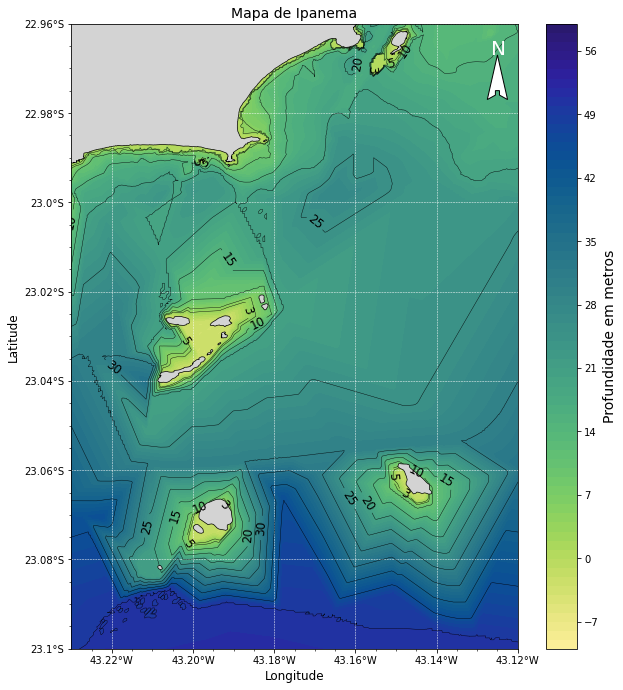

In [96]:
#Colocando o mapa base criado anteriormente
import cmocean
import json
data = json.load(open("/Users/jonatan/Documents/Aprendendo Python/datasets/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure(figsize=(10,11.5))
ax = fig.add_subplot(111)

from shapely.geometry import asShape # manipulando geometria
from descartes import PolygonPatch 
ax.set_xlim(-43.23, -43.12) # 0.12
ax.set_ylim(-23.1, -22.96) # 0.15
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--',color='white')
ax.set_yticks(np.arange(-23.10,-22.96,0.02))
ax.minorticks_on()
ax.set_yticklabels(['23.1°S' , '23.08°S', '23.06°S', '23.04°S', '23.02°S', '23.0°S'  , '22.98°S', '22.96°S'])
ax.set_xticklabels(['43,24°W','43.22°W', '43.20°W' , '43.18°W', '43.16°W', '43.14°W', '43.12°W'])


for feat in data["features"]:
    # convertendo a geometria p/ shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.7, ls='-', zorder=2))


#Inserindo mapa de contorno    
import matplotlib as mpl
cmap = cmocean.cm.haline_r #Cor do mapa invertida (colocar '_r')
levels = (np.arange(-10,60,1)) #Definindo os intervalos de cores
linhas = (3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,80,90) #Definindo os intervalos de linhas de contorno
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both') #Normalização

# Criando mapa de contorno por três variáveis - contourf preenche
contorno = plt.tricontourf(batimetria['lon'],batimetria['lat'],batimetria['z'], cmap=cmap,levels=levels)

#Criando mapa de linhas de contorno por três variáveis
contorno_linhas = plt.tricontour(batimetria['lon'],batimetria['lat'],batimetria['z'], colors='k',
                                 levels=linhas,linestyles='-',linewidths=0.4)
plt.clabel(contorno_linhas,linhas,fmt='%1.0f',fontsize=12)

#North Arrow
ax.arrow(-43.125, -22.975, 0, 0.008, length_includes_head=True,
          head_width=0.005, head_length=0.01, overhang=.1, facecolor='white')
ax.text(x=-43.125-0.0015, y=-22.975+0.008, s='N', fontsize=20,color='white')

#Scale Bar




#Plotando a colorbar
cbar = fig.colorbar(contorno, ax=ax)
cbar.set_label(label='Profundidade em metros',fontsize=14)
plt.show()

RECORTANDO UMA ÁREA DO MAPA

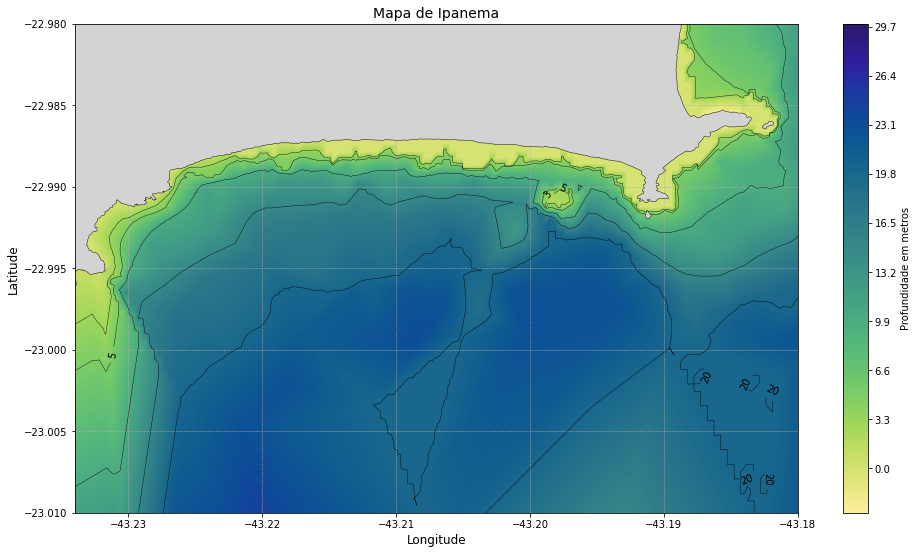

In [53]:
import json
data = json.load(open("/Users/jonatan/Documents/Aprendendo Python/datasets/Limite_do_Munic%C3%ADpio_do_Rio_de_Janeiro.geojson"))
fig = plt.figure(figsize=(16.2,9)) # create a figure to contain the plot elements
ax = fig.add_subplot(111)

from shapely.geometry import asShape # manipulating geometry
from descartes import PolygonPatch 
ax.set_xlim(-43.234, -43.18) # 0.054
ax.set_ylim(-23.01, -22.98) # 0.03
ax.set_title('Mapa de Ipanema', fontsize=14)
ax.set_ylabel('Latitude',fontsize=12)
ax.set_xlabel('Longitude', fontsize=12)
plt.grid(linewidth=0.5, linestyle='--')
ax.set_yticks(np.arange(-23.01,-22.98,0.005))


for feat in data["features"]:
    # convert the geometry to shapely
    geom = asShape(feat["geometry"])
    ax.add_patch(PolygonPatch(feat["geometry"], fc='lightgrey', ec='black',
                alpha=1, lw=0.45, ls='-', zorder=2))

import matplotlib as mpl
cmap = cmocean.cm.haline_r
levels = (np.arange(-3,30,0.1))
linhas = (3,5,10,15,20,25,30,35,40,45,50,55,60,65,70,80,90)
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
contorno = plt.tricontourf(batimetria['lon'],batimetria['lat'],batimetria['z'], cmap=cmap,levels=levels)
contorno_linhas = plt.tricontour(batimetria['lon'],batimetria['lat'],batimetria['z'], colors='k',
                                 levels=linhas,linestyles='-',linewidths=0.4)

plt.clabel(contorno_linhas,linhas,fmt='%1.0f')
fig.colorbar(contorno, ax=ax,label='Profundidade em metros')